In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('train.csv', low_memory=False)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.drop(['PassengerId', 'Cabin', 'Ticket'], inplace=True, axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [6]:
df.isnull().sum()        

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [7]:
df['Sex'] = df['Sex'].map({'female': 1, 'male': 0})

In [8]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


In [10]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df = df[pd.notnull(df['Embarked'])]
df.info()      
df.isnull().sum()        

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Name        889 non-null object
Sex         889 non-null int64
Age         712 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

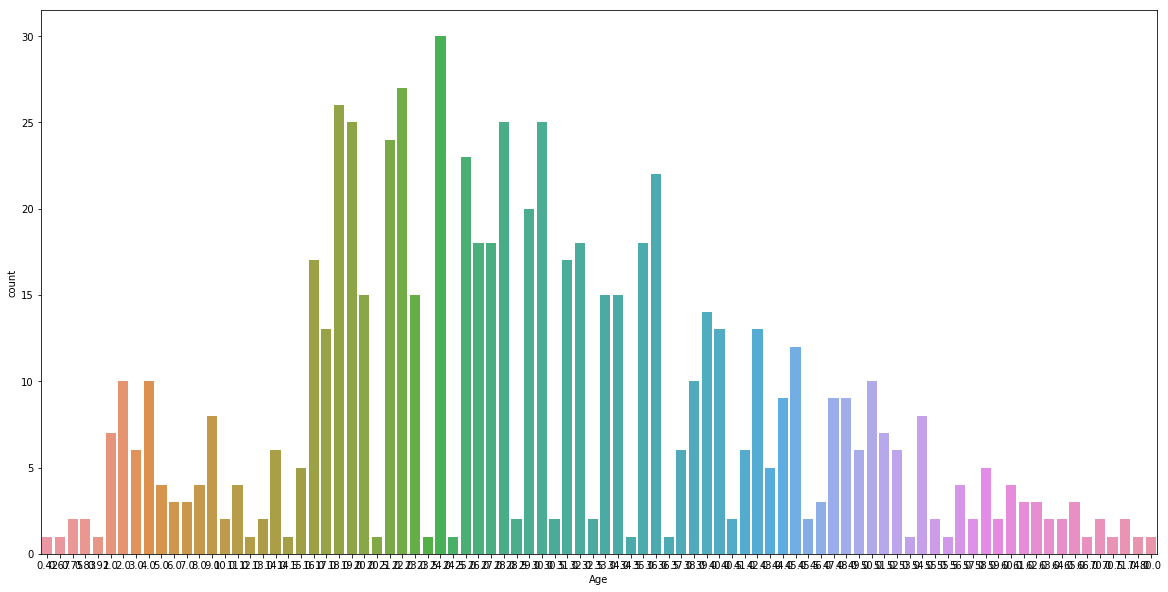

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(df['Age'], data=df)

In [13]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [14]:
df.isnull().sum()        

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [16]:
Embarked = pd.get_dummies(df['Embarked'], drop_first=True)
df.drop(['Embarked'], axis=1, inplace=True)
df = pd.concat([df, Embarked], axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,0,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0,1
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0,1


In [17]:
my_dict = {}
word_arr = []
for name in df['Name']:
    i = 0
    x = name.partition(',')
    y = x[2].split(' ')
    title = y[1]
    
    if title in my_dict:
        my_dict[title] += 1
    else:
        my_dict[title] = 1
    
    i = i+1
    
print(my_dict)


{'Mr.': 517, 'Mrs.': 124, 'Miss.': 181, 'Master.': 40, 'Don.': 1, 'Rev.': 6, 'Dr.': 7, 'Mme.': 1, 'Ms.': 1, 'Major.': 2, 'Lady.': 1, 'Sir.': 1, 'Mlle.': 2, 'Col.': 2, 'Capt.': 1, 'the': 1, 'Jonkheer.': 1}


In [18]:
df['Family_Size'] = df['Parch'] + df['SibSp']
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Q,S,Family_Size
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,1,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,0,0,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0,1,1
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0,1,0


In [19]:
df.drop(['SibSp', 'Parch'], inplace=True, axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Q,S,Family_Size
0,0,3,"Braund, Mr. Owen Harris",0,22.0,7.2500,0,1,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,71.2833,0,0,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,7.9250,0,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,53.1000,0,1,1
4,0,3,"Allen, Mr. William Henry",0,35.0,8.0500,0,1,0


In [20]:
df.drop(['Name'], inplace=True, axis=1)


In [21]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Q,S,Family_Size
0,0,3,0,22.0,7.2500,0,1,1
1,1,1,1,38.0,71.2833,0,0,1
2,1,3,1,26.0,7.9250,0,1,0
3,1,1,1,35.0,53.1000,0,1,1
4,0,3,0,35.0,8.0500,0,1,0


In [22]:
from sklearn.cross_validation import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Survived'], axis=1), df['Survived'], test_size=0.30)

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rf = RandomForestClassifier(min_samples_leaf=3, n_estimators = 1000, n_jobs=-1, oob_score=True, max_features="log2")

In [73]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [99]:
X_train

,Pclass,Sex,Age,Fare,Q,S,Family_Size
96,1,0,71.0,34.6542,0,0,0
119,3,1,2.0,31.2750,0,1,6
497,3,0,28.0,15.1000,0,1,0
555,1,0,62.0,26.5500,0,1,0
249,2,0,54.0,26.0000,0,1,1
638,3,1,41.0,39.6875,0,1,5
64,1,0,28.0,27.7208,0,0,0
391,3,0,21.0,7.7958,0,1,0
277,2,0,28.0,0.0000,0,1,0
730,1,1,29.0,211.3375,0,1,0


In [74]:
y_pred = rf.predict(X_test)

In [75]:
from sklearn.metrics import  r2_score, accuracy_score, confusion_matrix, classification_report

print(r2_score(y_test, y_pred))
print("\n")
print(accuracy_score(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print("\n")

0.3444910179640718


0.846441947565543


[[153  14]
 [ 27  73]]


             precision    recall  f1-score   support

          0       0.85      0.92      0.88       167
          1       0.84      0.73      0.78       100

avg / total       0.85      0.85      0.84       267





In [102]:
df_test = pd.read_csv('test.csv', low_memory=False)

In [103]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [104]:
df_test.drop(['PassengerId','Name','Cabin','Ticket'], inplace=True, axis=1)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [105]:
df_test['Sex'] = df_test['Sex'].map({'female': 1, 'male': 0})
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,Q
1,3,1,47.0,1,0,7.0000,S
2,2,0,62.0,0,0,9.6875,Q
3,3,0,27.0,0,0,8.6625,S
4,3,1,22.0,1,1,12.2875,S


In [107]:
df_test['Fare'] = df_test['Fare'].fillna(value=0)
df_test.isnull().sum()        

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         0
Embarked     0
dtype: int64

In [108]:
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())
df_test.isnull().sum()        

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [109]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,Q
1,3,1,47.0,1,0,7.0000,S
2,2,0,62.0,0,0,9.6875,Q
3,3,0,27.0,0,0,8.6625,S
4,3,1,22.0,1,1,12.2875,S


In [110]:
df_test['Family_Size'] = df_test['Parch'] + df_test['SibSp']

Embarked = pd.get_dummies(df_test['Embarked'], drop_first=True)
df_test.drop(['Embarked', 'Parch', 'SibSp'], axis=1, inplace=True)
df_test = pd.concat([df_test, Embarked], axis=1)
df_test.head()

,Pclass,Sex,Age,Fare,Family_Size,Q,S
0,3,0,34.5,7.8292,0,1,0
1,3,1,47.0,7.0000,1,0,1
2,2,0,62.0,9.6875,0,1,0
3,3,0,27.0,8.6625,0,0,1
4,3,1,22.0,12.2875,2,0,1


In [111]:
y_test_pred = rf.predict(df_test)

In [112]:
test = pd.read_csv('test.csv', low_memory=False)

In [113]:
pd.DataFrame({'PassengerId':test.PassengerId, 'Survived':y_test_pred}).set_index('PassengerId').to_csv('Titanic_Submission_RFCT.csv', float_format='%.f')